# Initializing QTLab stuff

In [1]:
%run C:\qtlab_replacement\init.py
from instruments import *
import numpy as np
import sweep
import pandas as pd
from save_pkl import *
from IPython.display import clear_output
import sys
import os
#os.chdir("C:\qtlab_replacement\instruments\_labbrick")
import numpy as np
sys.path.append('C:\Program Files\Keysight\SD1\Libraries\Python')
import keysightSD1

root: WARNING  Unable to load config file.


# Iniatializing Plotting and auxilary tools

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import pickle
import re

In [3]:
with open("PXIe_errors.txt", "r+") as f:
    data=re.split('\n', f.read())
    
Error_number = []
Error_message = []

for y in data:
    Error_number.append(int(y.split('\t')[1]))
    Error_message.append(y.split('\t')[2])
def Key_Error(error_number):
    if error_number in Error_number:
        print
        return (Error_message[Error_number.index(error_number)])
    else:
        return ("No message with this code")

# Iniatializing devices

In [4]:
CHASSIS  = 1
SLOT_IN  = 7
SLOT_OUT = 5
awg = Keysight_M3201A_S('awg', CHASSIS, SLOT_OUT)   # C:\qtlab_replacement\instruments\_Keysight_M3201A\simple_sync.py
#adc = Keysight_M3102A('adc', CHASSIS, SLOT_IN)

#AWG = keysightSD1.SD_AOU()
#AWG_id = AWG.openWithSlot("M3201A", 1, 5)   # chassis = 1, slot = 5

In [5]:
marker_length = 100
#readout_trigger_delay = 185
readout_trigger_delay = 0
trg_length = 10e-9

ex_clock = 1000e6
ro_clock = 1250e6

rep_rate = 20e3                                      # repetition rate of the experiment
global_num_points = 50000-500   #-500

awg.stop()
awg.check_cached = True
awg.set_clock(ex_clock)
awg.set_clock_output(True)
awg.set_nop(ex_clock/rep_rate)                    
awg.repetition_period = global_num_points

In [192]:
awg.module.waveforms = [None]*4
awg.module.AWGflush(nAWG=0)                        #remove waveform that was on this channel
awg.module.AWGflush(nAWG=1)
awg.module.AWGflush(nAWG=2)
awg.module.AWGflush(nAWG=3)

-8004

In [9]:
awg.get_clock = lambda: 1e9

In [11]:
print('AWG parameters: ')
print('Number of poinst:', awg.get_nop())
print('Channel Amplitudes:',awg.get_amplitude(0),'V',awg.get_amplitude(1),'V',awg.get_amplitude(2),'V',awg.get_amplitude(3),'V')
print('Clock:', round(awg.get_clock()),'ns')
print('Repetition_period:', round(awg.get_repetition_period()/1e9),'ns')

AWG parameters: 
Number of poinst: 49500
Channel Amplitudes: 0.2 V 0.2 V 0.2 V 0.2 V
Clock: 1000000000 ns
Repetition_period: 49500 ns


In [12]:
# channel 0 is master and triggers all others
awg.trigger_source_types = [6, 6,6,6]                 # Trigger source (soft,hard etc) 6  external per cycle, 0 -soft (from PC)
awg.trigger_source_channels = [4000, 4000,4000,4000]  # External trigger source. 0 means PXI trigger, 4000+
awg.trigger_delays = [0,0,0,0]                        # Master channel should wait 400 ns for others to start
awg.trigger_behaviours = [4,4,4,4]                    # Rising/Falling edge etc 4 - Falling

In [13]:
wf   = np.sin(np.linspace(-np.pi,np.pi,awg.get_nop(), endpoint=False)*20)
wf_d = np.asarray(wf).tolist()

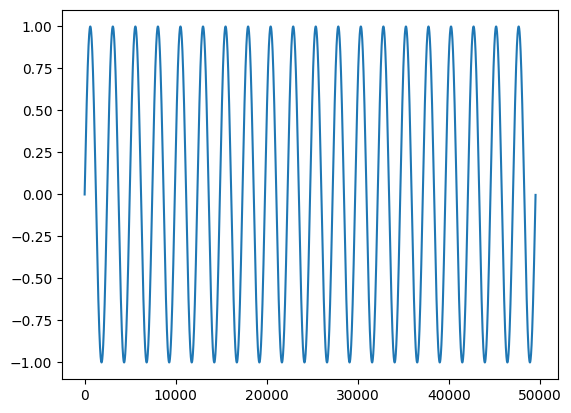

In [14]:
plt.plot(wf_d)

In [15]:
awg.trigger_source_types = [0,6,6,6]
awg.trigger_source_channels = [0, 4000,4000,4000]
awg.trigger_delays = [40, 0,0,0]
awg.trigger_behaviours = [0,4,4,4]
awg.set_trigger_mode(2)
for channel in range(0,4):
    awg.set_amplitude(1, channel = channel)
    awg.set_offset(0.0, channel = channel)
    awg.set_output(1, channel = channel)
    awg.set_waveform(waveform = wf_d, channel = channel)

In [16]:
awg.set_marker(length = 200, delay = 0, channel = 0, pxi_channels = 1)

In [22]:
awg.run()

In [160]:
awg.stop()

In [105]:
# а вот длину сэмплов, которая очевидно то же самое, нужно задавать на всех авгшках.
# хорошо, что сейчас она только одна.

awg.set_trigger_mode(1)                           # external trigger mode

In [106]:
awg.trigger_source_channels = [0, 0, 0, 0]        # = 0 for external trigger
awg.trigger_delays = [1,1,1,1]
awg.trigger_behaviours = [4,4,4,4]                # Trigger is active on the falling edge
awg.trigger_source_types = [6,6,6,6]              # External HARDWARE trigger per cycle

In [126]:
for channel in range(0,4):
    #awg.set_amplitude(1.0, channel=channel)
    awg.set_offset(0.0,channel=channel)
    awg.set_output(1, channel=channel)
    awg.set_waveform(waveform = [1]*global_num_points, channel=channel)

In [127]:
awg.set_amplitude(1.0, channel = 0)
awg.set_amplitude(1.0, channel = 1)
awg.set_amplitude(0.2, channel = 2)
awg.set_amplitude(0.2, channel = 3)

In [128]:
print(awg.module.clockResetPhase(3, 0))

-8032


In [129]:
Key_Error(awg.module.clockResetPhase(3, 0))

'Hardware error'

In [130]:
awg.set_marker(length=100, delay=0, channel=0, pxi_channels=1)

In [131]:
awg.run()

# Time domain regime

In [122]:
from libraries import awg_iq_multi

In [125]:
iq_ro = awg_iq_multi(awg, awg, 0, 1, lo1) #M3202A

NameError: name 'lo1' is not defined

In [62]:
adc = Keysight_M3102A('adc', CHASSIS, SLOT_IN)   

-8004
-8004
-8004
-8004


In [63]:
Key_Error(-8004)

'Module not opened'

In [ ]:
adc.reset()
#Установить sample rate
adc.set_clock(ro_clock)
adc.set_clock_mode('pxi')

#Выбрать канал (оба)
adc.select_channel01()
adc.set_channel01_amps(200,200)

adc.set_trigger_ext0_level0(500) # logical 0 value to 200 mV
adc.set_trigger_ext0_level1(600) # logical 1 value to 600 mV
adc.trigger_mode_pos()
adc.set_trigger_ext0_pulsewidth(0)

adc.set_trigger_ext0()
adc.set_trigger_termination(1)
#Сегментированный режим
#adc.set_multi_mode()
#Настроить входнй диапазон в мв
#adc.init_channel01_multiple_recording()
#Настроить режим измерения
adc.set_multi_record_mode()

#Выбрать канал (оба)

In [136]:
awg.get_offset(channel = 0)

AttributeError: 'Keysight_M3201A_S' object has no attribute 'offset'

In [111]:
awg.set_offset(0.0,channel=0)

In [64]:
awg.get_clock = lambda: 1e9

In [65]:
awg.set_trigger_mode(2)
# channel 0 is master and triggers all others
awg.trigger_source_types = [6,6,6,6]                   # Trigger source (soft,hard etc) 6  external per cycle, 0 -soft (from PC)
awg.trigger_source_channels = [4000, 4000,4000,4000]   # External trigger source. 0 means PXI trigger, 4000+
awg.trigger_delays = [0,0,0,0]                         # Master channel should wait 400 ns for others to start
awg.trigger_behaviours = [4,4,4,4]                     # Rising/Falling edge etc 4 - Falling

In [66]:
wf = np.sin(np.linspace(-np.pi,np.pi, awg.get_nop(), endpoint=False)*10)
wf_d= np.asarray(wf).tolist()

for channel in range(0,4):
    awg.set_amplitude(0.2, channel=channel)
    awg.set_offset(0.0,channel=channel)
    awg.set_output(1, channel=channel)
    awg.set_waveform(waveform = wf_d, channel=channel)

#for channel in range(0,4):
#    awg.set_amplitude(0.03, channel=channel)
#    awg.set_offset(0.7,channel=channel)
#    awg.set_output(1, channel=channel)
#    awg.set_waveform(waveform =[0]*99500, channel=channel)
    
awg.run()

In [67]:
awg.stop()

In [68]:
import imp
from libraries import pulses as pulses
from libraries import awg_iq_multi, data_reduce, fitting, plotting, tomography, sweep, sweep_extras, awg_channel
imp.reload(awg_iq_multi)
imp.reload(data_reduce)
imp.reload(fitting)
imp.reload(plotting)
imp.reload(tomography)
imp.reload(sweep)
imp.reload(sweep_extras)
imp.reload(pulses)
imp.reload(awg_channel)

<module 'libraries.awg_channel' from 'C:\\qtlab_replacement\\libraries\\awg_channel.py'>

In [69]:
marker_length = 100
#readout_trigger_delay = 185
readout_trigger_delay = 0
trg_length = 10e-9

ex_clock = 1000e6
#ro_clock = 1250e6
ro_clock = 1000e6

rep_rate = 10e3 # частота повторений эксперимента
global_num_points = 100000-500

awg.stop()

In [70]:
awg.set_clock(ex_clock)
awg.set_clock_output(True)
awg.set_nop(ex_clock/rep_rate)              # репрейт нужно задавать по=хорошему только на управляющей,
awg.repetition_period = global_num_points

In [71]:
awg.module.waveforms = [None]*4
awg.module.AWGflush(nAWG=0)                 #убирает waveforms, которые были на этом канале
awg.module.AWGflush(nAWG=1)
awg.module.AWGflush(nAWG=2)
awg.module.AWGflush(nAWG=3)

-8004

In [15]:
# а вот длину сэмплов, которая очевидно то же самое, нужно задавать на всех авгшках.
# хорошо, что сейчас она только одна.
#this is zashkvar
awg.set_trigger_mode(1)

awg.trigger_source_channels = [0, 0, 0, 0]
awg.trigger_delays = [1,1,1,1]


awg.trigger_behaviours = [4,4,4,4] #Trigger is active on the falling edge
awg.trigger_source_types = [6,6,6,6] # External HARDWARE trigger per cycle

for channel in range(0,4):
    #awg.set_amplitude(1.0, channel=channel)
    awg.set_offset(0.0,channel=channel)
    awg.set_output(1, channel=channel)
    awg.set_waveform(waveform =[0]*global_num_points, channel=channel)
    
awg.set_amplitude(1.0, channel=0)
awg.set_amplitude(1.0, channel=1)
awg.set_amplitude(1.0, channel=2)
awg.set_amplitude(1.0, channel=3)

print(awg.module.clockResetPhase(3, 0))
    
awg.set_marker(length=200, delay=0, channel=0, pxi_channels=2)

awg.run()

awg_channels =dict()

-8032


In [16]:
awg.set_waveform([1]*200+[0]*(global_num_points-200), channel=0)
awg.set_waveform([0]*200+[0]*(global_num_points-200), channel=0)

awg.run()

In [17]:
awg.get_amplitude(1)

1.0

In [ ]:
RectSine(amplitude, period, duration, phase, offset, delay)

In [17]:
def RectSine(amplitude, period, duration, phase, offset, delay):
    DATA_LENGTH = 32768
    ClockPeriod = 2e-9
    Points = np.linspace(-delay, ClockPeriod*(DATA_LENGTH-1)-delay, 32768)
    #print Points
    Pulse = np.where(Points>=0, np.where(Points<duration, (amplitude*np.sin(2*np.pi*Points/period+phase)).astype(int).tolist(), 0), 0) + int(offset)
    #print Pulse
    return Pulse

def DoubleRectSine(amplitude, period, duration, phase, offset, delay1, delay2):
    DATA_LENGTH = 32768
    ClockPeriod = 2e-9
    Points = np.linspace(0, ClockPeriod*(DATA_LENGTH-1), 32768)
    #print Points
    Pulse = np.where(Points>=delay1, np.where(Points<duration+delay1, (amplitude*np.sin(2*np.pi*Points/period+phase)).astype(int).tolist(), 0), 
                     0)+np.where(Points>=delay2, np.where(Points<duration+delay2, (amplitude*np.sin(2*np.pi*Points/period+phase)).astype(int).tolist(), 0), 0)+int(offset)
    #print Pulse
    return Pulse
def GaussSine(amplitude, period, length, phase, offset, delay):
    DATA_LENGTH = 32768
    ClockPeriod = 2e-9
    WindowSizeSigma = 6
    #Sigma = fwhm/np.sqrt(8*np.log(2))
    #WindowWidth = WindowSizeSigma*Sigma
    WindowWidth = length
    Sigma = WindowWidth/WindowSizeSigma
    Points = np.linspace(0, ClockPeriod*(DATA_LENGTH-1), 32768)
    envelope = amplitude*np.exp(-0.5*(Points-delay-WindowWidth/2)**2/Sigma**2)
    Pulse = (envelope*np.sin(2*np.pi*Points/period+phase)+offset).astype(int).tolist()
    return Pulse

def DoubleGaussSine(amplitude, period, length, phase, offset, delay1, delay2):
    DATA_LENGTH = 32768
    ClockPeriod = 2e-9
    WindowSizeSigma = 6
    #Sigma = fwhm/np.sqrt(8*np.log(2))
    #WindowWidth = WindowSizeSigma*Sigma
    WindowWidth = length
    Sigma = WindowWidth/WindowSizeSigma
    Points = np.linspace(0, ClockPeriod*(DATA_LENGTH-1), 32768)
    envelope = amplitude*np.exp(-0.5*(Points-delay1-WindowWidth/2)**2/(Sigma*0.5)**2)+amplitude*np.exp(-0.5*(Points-delay2-WindowWidth/2)**2/(Sigma*0.5)**2)
    Pulse = (envelope*np.sin(2*np.pi*Points/period+phase)+offset).astype(int).tolist()
    return Pulse

def RectSine2(amplitude, period, duration, phase, offset_off, offset_on, delay):
    DATA_LENGTH = 32768
    ClockPeriod = 2e-9
    Points = np.linspace(-delay, ClockPeriod*(DATA_LENGTH-1)-delay, 32768)
    #print Points
    Pulse = np.where(Points>=0, np.where(Points<duration, (amplitude*np.sin(2*np.pi*Points/period+phase)+(offset_on-offset_off)).astype(int).tolist(), 0), 0) + int(offset_off)
    #print Pulse
    return Pulse